## 0 用到的筛选清洗后的数据

#建成环境-poi#          1-poi-manhattan-filtered.geojson ##facility_t	
#建成环境-年代&风格#      1_year&style_label.geojson
#感知#               1_percep_mht.geojson

In [1]:
import geopandas as gpd  
import pandas as pd  
from shapely.geometry import Point, Polygon  
import matplotlib.pyplot as plt  
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
from shapely.geometry import Point, box  

## 1 import data

In [2]:
gdf_poi = gpd.read_file('1_poi_manhattan_filtered.geojson')
gdf_label = gpd.read_file('1_year&style_label.geojson')
gdf_per = gpd.read_file('1_percep_mht.geojson') 

In [3]:
# 检查坐标系信息  
crs = gdf_per.get('crs')
print(crs)

None


In [4]:
crs = 'epsg:4326'  # 根据geometry判断的原始坐标系 

gdf_poi = gpd.GeoDataFrame(gdf_poi, crs=crs)

gdf_label = gpd.GeoDataFrame(gdf_label,crs=crs) 

gdf_per = gpd.GeoDataFrame(gdf_per, crs=crs) 

In [5]:
# 检查坐标系信息2  
crs = gdf_per.get('crs')
print(crs) 

#默认是WGS84坐标系 也就是 EPSG 4326坐标系

None


## 2 CRS TO 2263 (UNIT:feet)

In [6]:
gdf_poi

,name,source,faci_dom,facility_t,geometry
0,HOLLAND,DoITT,9,6,POINT (-74.00702 40.72463)
1,MANHATTAN,DoITT,8,6,POINT (-73.99194 40.70960)
2,145,DoITT,8,6,POINT (-73.93314 40.81948)
3,LINCOLN,DoITT,9,6,POINT (-73.99914 40.75885)
4,WILLIAMSBURG,DoITT,8,6,POINT (-73.97581 40.71470)
...,...,...,...,...,...
5850,CITY HALL PARK,OTHER,1,4,POINT (-74.00644 40.71254)
5851,COLLEGIATE SCHOOL,OTHER,18,2,POINT (-73.99058 40.77378)
5852,CARL SCHURZ PARK,OTHER,1,4,POINT (-73.94350 40.77514)
5853,BELLA ABZUG PARK,OTHER,1,4,POINT (-74.00048 40.75567)


In [7]:
# 将坐标系转换为纽约的2263坐标系  
gdfpoi = gdf_poi.to_crs('epsg:2263') 
gdfpoi

,name,source,faci_dom,facility_t,geometry
0,HOLLAND,DoITT,9,6,POINT (982304.930 203280.783)
1,MANHATTAN,DoITT,8,6,POINT (986484.122 197803.225)
2,145,DoITT,8,6,POINT (1002755.227 237843.263)
3,LINCOLN,DoITT,9,6,POINT (984486.856 215746.007)
4,WILLIAMSBURG,DoITT,8,6,POINT (990955.244 199662.570)
...,...,...,...,...,...
5850,CITY HALL PARK,OTHER,1,4,POINT (982465.909 198873.678)
5851,COLLEGIATE SCHOOL,OTHER,18,2,POINT (986857.737 221185.613)
5852,CARL SCHURZ PARK,OTHER,1,4,POINT (999898.594 221686.372)
5853,BELLA ABZUG PARK,OTHER,1,4,POINT (984115.584 214589.211)


In [8]:
gdf_label

,gid,year,style,period_label,style_label,longitude,latitude,streetPt_x,streetPt_y,angle,geometry
0,708881,1910,11-International style,2,11,-73.938776,40.837812,-73.938641,40.837994,209,POINT (-73.93878 40.83781)
1,584238,1935,10-Brutalism,3,10,-73.982297,40.745160,-73.982387,40.745036,28,POINT (-73.98230 40.74516)
2,66240,1931,0-Colonial architecture,3,0,-73.964046,40.758556,-73.963917,40.758733,209,POINT (-73.96405 40.75856)
3,23730,1910,0-Colonial architecture,2,0,-73.990650,40.765195,-73.990746,40.765063,28,POINT (-73.99065 40.76519)
4,512541,1900,9-Art Deco architecture,2,9,-73.993023,40.717539,-73.993252,40.717603,110,POINT (-73.99302 40.71754)
...,...,...,...,...,...,...,...,...,...,...,...
44521,1299511,2023,8-Art Nouveau architecture,6,8,-73.981397,40.783298,-73.981255,40.783492,209,POINT (-73.98140 40.78330)
44522,397379,1920,4-American craftsman style,3,4,-73.995768,40.720351,-73.995945,40.720390,106,POINT (-73.99577 40.72035)
44523,1296496,2022,11-International style,6,11,-73.995630,40.758531,-73.995440,40.758793,208,POINT (-73.99563 40.75853)
44524,1299576,2023,11-International style,6,11,-73.995915,40.758476,-73.996218,40.758604,118,POINT (-73.99591 40.75848)


In [9]:
# 将坐标系转换为纽约的2263坐标系  
gdflab = gdf_label.to_crs('epsg:2263') 
gdflab

,gid,year,style,period_label,style_label,longitude,latitude,streetPt_x,streetPt_y,angle,geometry
0,708881,1910,11-International style,2,11,-73.938776,40.837812,-73.938641,40.837994,209,POINT (1001191.226 244520.907)
1,584238,1935,10-Brutalism,3,10,-73.982297,40.745160,-73.982387,40.745036,28,POINT (989155.370 210759.403)
2,66240,1931,0-Colonial architecture,3,0,-73.964046,40.758556,-73.963917,40.758733,209,POINT (994210.607 215641.381)
3,23730,1910,0-Colonial architecture,2,0,-73.990650,40.765195,-73.990746,40.765063,28,POINT (986839.977 218058.082)
4,512541,1900,9-Art Deco architecture,2,9,-73.993023,40.717539,-73.993252,40.717603,110,POINT (986183.895 200695.504)
...,...,...,...,...,...,...,...,...,...,...,...
44521,1299511,2023,8-Art Nouveau architecture,6,8,-73.981397,40.783298,-73.981255,40.783492,209,POINT (989401.880 224654.061)
44522,397379,1920,4-American craftsman style,3,4,-73.995768,40.720351,-73.995945,40.720390,106,POINT (985423.111 201719.958)
44523,1296496,2022,11-International style,6,11,-73.995630,40.758531,-73.995440,40.758793,208,POINT (985460.446 215630.405)
44524,1299576,2023,11-International style,6,11,-73.995915,40.758476,-73.996218,40.758604,118,POINT (985381.641 215610.236)


In [10]:
gdf_per

,Latitude,Longitude,slabel,negative,neutral,positive,geometry
0,40.683935,-74.026675,positive,0.001512607,0.022863684,0.975623727,POINT (-74.02667 40.68393)
1,40.683935,-74.026675,neutral,0.168938398,0.766074955,0.064986661,POINT (-74.02667 40.68393)
2,40.683935,-74.026675,positive,0.001763745,0.036507055,0.961729228,POINT (-74.02667 40.68393)
3,40.683935,-74.026675,positive,0.010493562,0.326466173,0.66304028,POINT (-74.02667 40.68393)
4,40.683935,-74.026675,positive,0.018645648,0.231529653,0.749824762,POINT (-74.02667 40.68393)
...,...,...,...,...,...,...,...
37797,40.683935,-74.026675,neutral,0.04394326,0.753184259,0.202872485,POINT (-74.02667 40.68393)
37798,40.690635,-73.981824,neutral,0.134938374,0.836175561,0.028886005,POINT (-73.98182 40.69064)
37799,40.690635,-73.981824,neutral,0.180668324,0.796008766,0.023322821,POINT (-73.98182 40.69064)
37800,40.690635,-73.981824,neutral,0.180668324,0.796008766,0.023322821,POINT (-73.98182 40.69064)


In [11]:
# 将坐标系转换为纽约的2263坐标系  
gdfper = gdf_per.to_crs('epsg:2263') 
gdfper

,Latitude,Longitude,slabel,negative,neutral,positive,geometry
0,40.683935,-74.026675,positive,0.001512607,0.022863684,0.975623727,POINT (976851.717 188453.648)
1,40.683935,-74.026675,neutral,0.168938398,0.766074955,0.064986661,POINT (976851.717 188453.648)
2,40.683935,-74.026675,positive,0.001763745,0.036507055,0.961729228,POINT (976851.717 188453.648)
3,40.683935,-74.026675,positive,0.010493562,0.326466173,0.66304028,POINT (976851.717 188453.648)
4,40.683935,-74.026675,positive,0.018645648,0.231529653,0.749824762,POINT (976851.717 188453.648)
...,...,...,...,...,...,...,...
37797,40.683935,-74.026675,neutral,0.04394326,0.753184259,0.202872485,POINT (976851.717 188453.648)
37798,40.690635,-73.981824,neutral,0.134938374,0.836175561,0.028886005,POINT (989290.536 190894.085)
37799,40.690635,-73.981824,neutral,0.180668324,0.796008766,0.023322821,POINT (989290.536 190894.085)
37800,40.690635,-73.981824,neutral,0.180668324,0.796008766,0.023322821,POINT (989290.536 190894.085)


### gdfpoi gdflabel gdfper

## 3 generate grid:1000*1000 feet

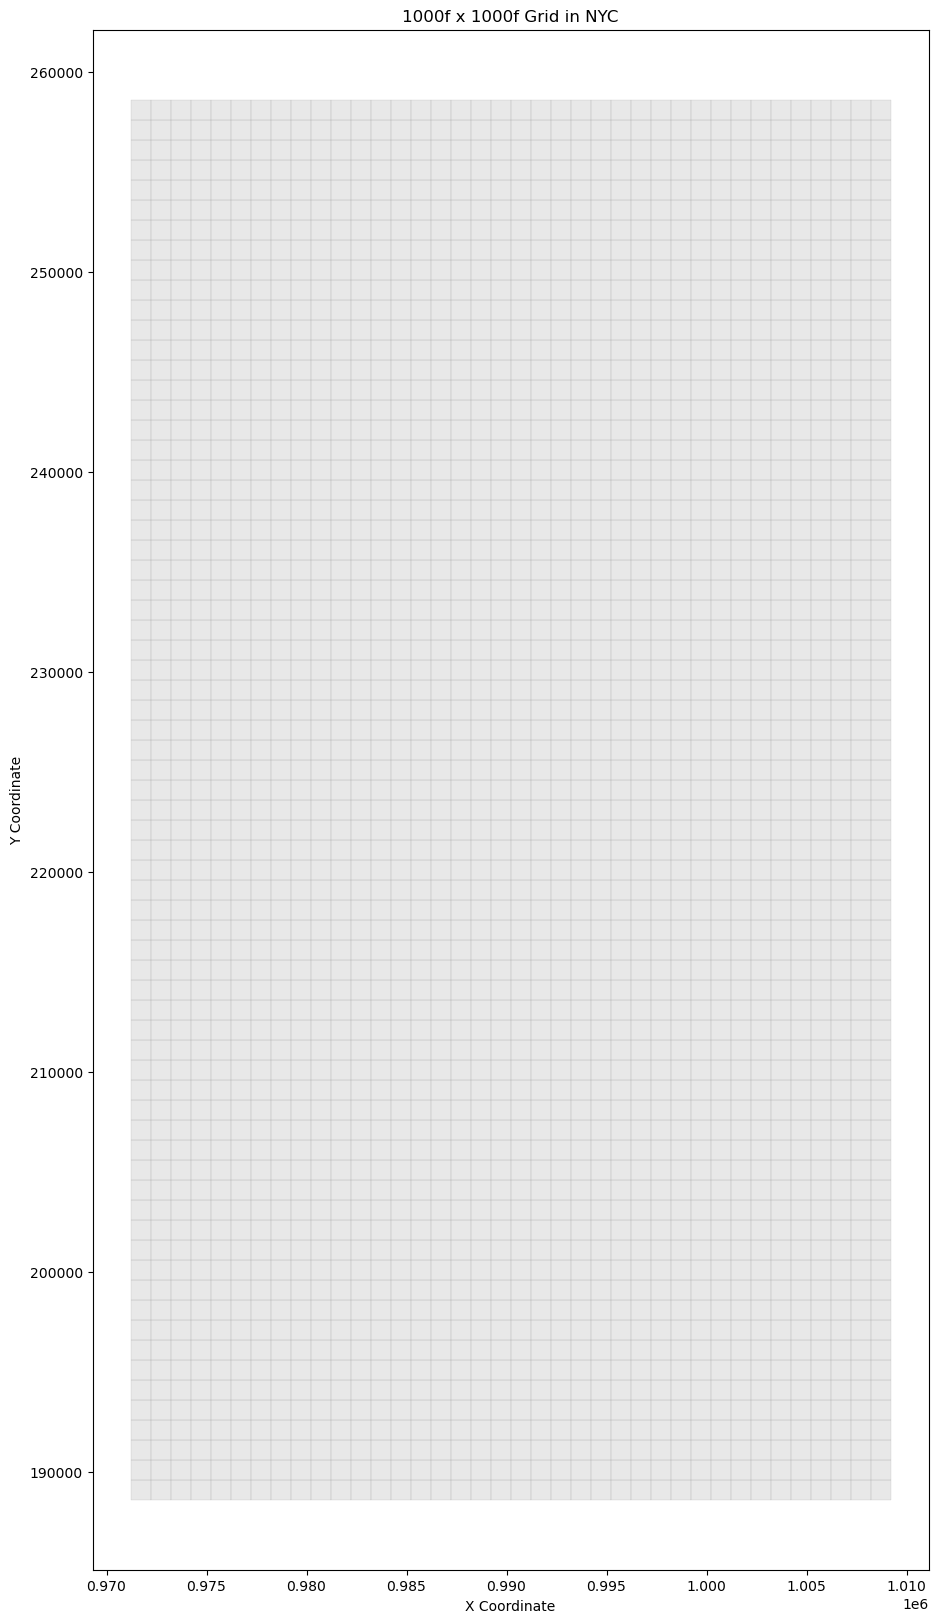

In [12]:
# 创建网格边界框，按照gdf label来，比较全 
xmin, ymin, xmax, ymax = gdflab.total_bounds  
grid_size = 1000 # 网格大小

# 计算行数和列数  
cols = range(int(xmin), int(xmax), grid_size)  
rows = range(int(ymin), int(ymax), grid_size)  
  
# 创建网格DataFrame  
grid = []  
for y1, y2 in zip(rows[:-1], rows[1:]):  
    for x1, x2 in zip(cols[:-1], cols[1:]):  
        grid.append(box(x1, y1, x2, y2))  
grid_gdf = gpd.GeoDataFrame(geometry=grid, crs='epsg:2263')  
  
# 将网格DataFrame的索引值作为网格的ID，并将ID添加到网格DataFrame中  
grid_gdf['grid_id'] = grid_gdf.index.astype(int)  
  
# 可视化网格  
fig, ax = plt.subplots(figsize=(20, 20))  
grid_gdf.plot(ax=ax, color='lightgray', alpha=0.5, edgecolor='gray', linewidth=0.2)  
plt.title('1000f x 1000f Grid in NYC')  
plt.xlabel('X Coordinate')  
plt.ylabel('Y Coordinate')  
plt.show()  

In [13]:
# 获取每个网格的ID和多边形Polygon  
def get_polygon(row):  
    return row.grid_id, row.geometry  
  
polygons = [get_polygon(row) for index, row in grid_gdf.iterrows()]  
  
# 将多边形Polygon创建为一个新的GeoDataFrame  
poly_gdf = gpd.GeoDataFrame(polygons, columns=['grid_id', 'geometry'], crs='epsg:2263')  


# 输出网格DataFrame和多边形的GeoDataFrame   
print(poly_gdf) 

      grid_id                                           geometry
0           0  POLYGON ((972200.000 188605.000, 972200.000 18...
1           1  POLYGON ((973200.000 188605.000, 973200.000 18...
2           2  POLYGON ((974200.000 188605.000, 974200.000 18...
3           3  POLYGON ((975200.000 188605.000, 975200.000 18...
4           4  POLYGON ((976200.000 188605.000, 976200.000 18...
...       ...                                                ...
2655     2655  POLYGON ((1005200.000 257605.000, 1005200.000 ...
2656     2656  POLYGON ((1006200.000 257605.000, 1006200.000 ...
2657     2657  POLYGON ((1007200.000 257605.000, 1007200.000 ...
2658     2658  POLYGON ((1008200.000 257605.000, 1008200.000 ...
2659     2659  POLYGON ((1009200.000 257605.000, 1009200.000 ...

[2660 rows x 2 columns]


## 4 poi&label&perception point visualization

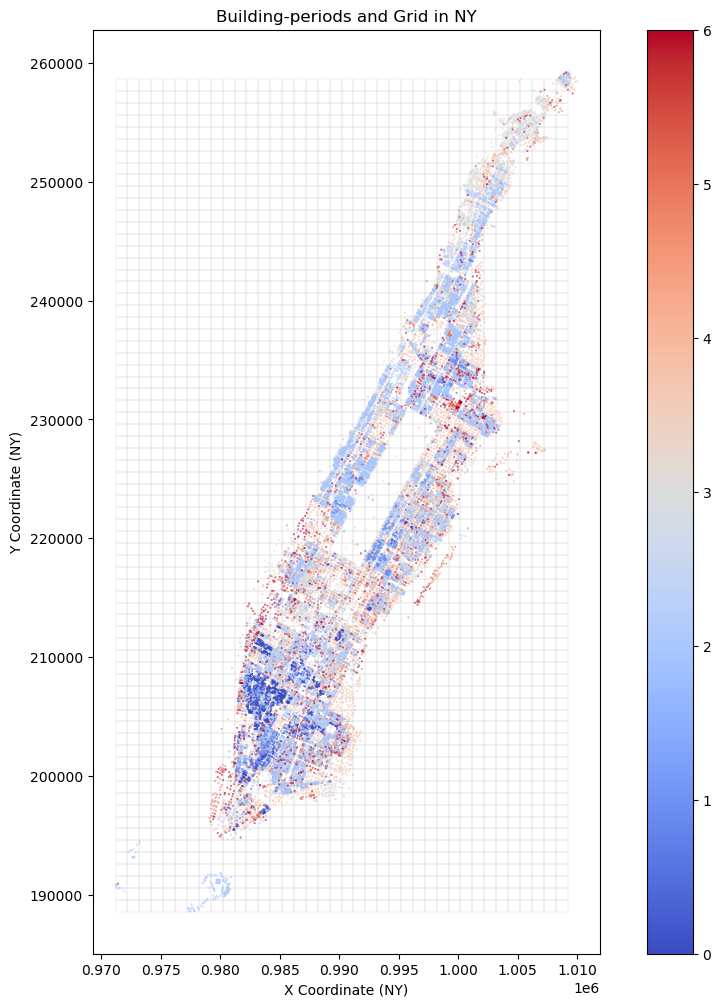

In [14]:
# 1 gdflabel-period buildings and grid visualization

# 指定属性列和颜色映射  
column = 'period_label'  
cmap = 'coolwarm' 

fig, ax = plt.subplots(figsize=(12, 12))  
grid_gdf.plot(ax=ax, facecolor='none', edgecolor='gray',linewidth=0.1, alpha=0.7)  
gdflab.plot(ax=ax, markersize=0.1, column=column, cmap=cmap, legend=True)  
plt.xlabel('X Coordinate (NY)')  
plt.ylabel('Y Coordinate (NY)')  
plt.title('Building-periods and Grid in NY')  
plt.show() 

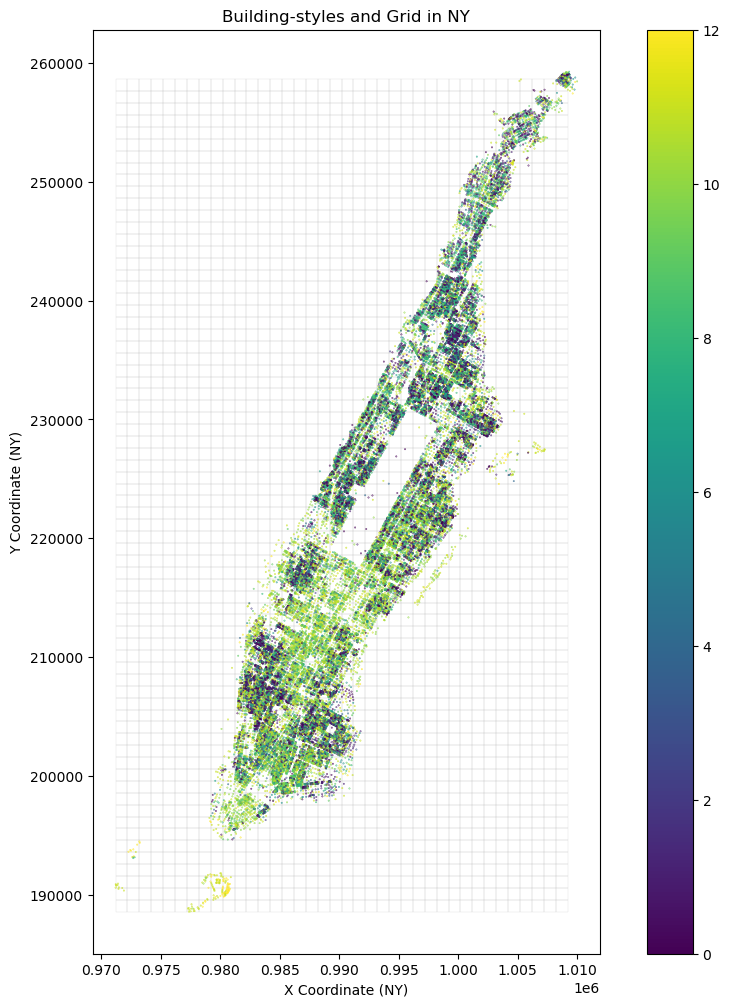

In [15]:
# 1 gdflabel-style buildings and grid visualization

# 指定属性列和颜色映射  
column = 'style_label'  
cmap = 'viridis' 

fig, ax = plt.subplots(figsize=(12, 12))  
grid_gdf.plot(ax=ax, facecolor='none', edgecolor='gray',linewidth=0.1, alpha=0.7)  
gdflab.plot(ax=ax, markersize=0.1, column=column, cmap=cmap, legend=True)  
plt.xlabel('X Coordinate (NY)')  
plt.ylabel('Y Coordinate (NY)')  
plt.title('Building-styles and Grid in NY')  
plt.show() 

1 Residential
2 Education Facility
3 Cultural Facility
4 Recreational Facility
5 Social Services
6 Transportation Facility
7 Commercial
8 Government Facility (non public safety)
9 Religious Institution
10 Health Services
11 Public Safety
12 Water
13 Miscellaneous

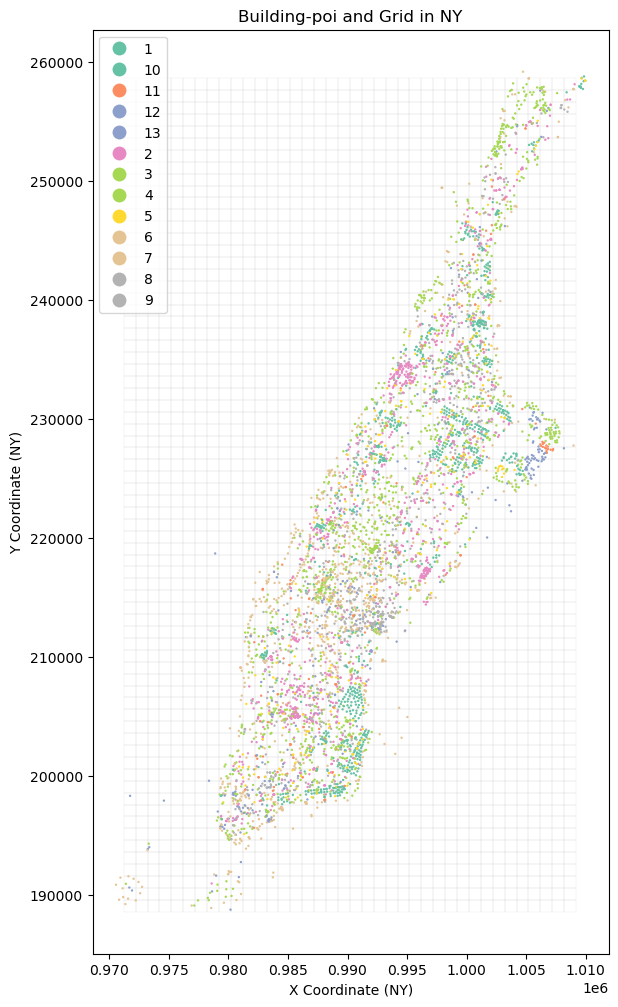

In [16]:
# 2 gdfpoi buildings and grid visualization

column = 'facility_t'  
cmap = 'Set2' 

fig, ax = plt.subplots(figsize=(12, 12))  
grid_gdf.plot(ax=ax, facecolor='none', edgecolor='gray',linewidth=0.1, alpha=0.5)  
gdfpoi.plot(ax=ax, markersize=0.5, column=column, cmap=cmap, legend=True)  
plt.xlabel('X Coordinate (NY)')  
plt.ylabel('Y Coordinate (NY)')  
plt.title('Building-poi and Grid in NY')  
plt.show()

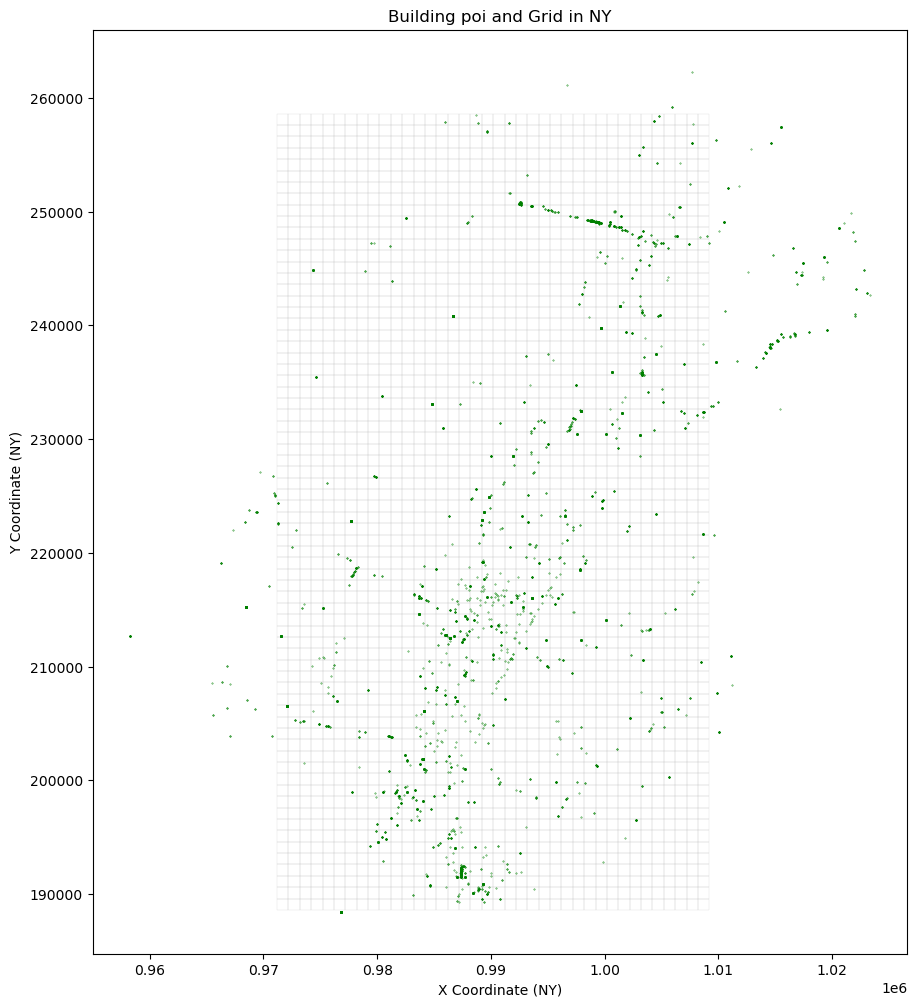

In [17]:
# 3 gdfperception buildings and grid visualization

fig, ax = plt.subplots(figsize=(12, 12))  
grid_gdf.plot(ax=ax, facecolor='none', edgecolor='gray',linewidth=0.1, alpha=0.7)  
gdfper.plot(ax=ax, markersize=0.1, color='green')  
plt.xlabel('X Coordinate (NY)')  
plt.ylabel('Y Coordinate (NY)')  
plt.title('Building poi and Grid in NY')  
plt.show() 

## 5 spatial join

In [18]:
grid_with_label = gpd.sjoin(grid_gdf.set_crs('epsg:2263'), gdflab, how='right')

In [19]:
grid_with_label

,index_left,grid_id,gid,year,style,period_label,style_label,longitude,latitude,streetPt_x,streetPt_y,angle,geometry
0,2119.0,2119.0,708881,1910,11-International style,2,11,-73.938776,40.837812,-73.938641,40.837994,209,POINT (1001191.226 244520.907)
1,853.0,853.0,584238,1935,10-Brutalism,3,10,-73.982297,40.745160,-73.982387,40.745036,28,POINT (989155.370 210759.403)
2,1049.0,1049.0,66240,1931,0-Colonial architecture,3,0,-73.964046,40.758556,-73.963917,40.758733,209,POINT (994210.607 215641.381)
3,1117.0,1117.0,23730,1910,0-Colonial architecture,2,0,-73.990650,40.765195,-73.990746,40.765063,28,POINT (986839.977 218058.082)
4,470.0,470.0,512541,1900,9-Art Deco architecture,2,9,-73.993023,40.717539,-73.993252,40.717603,110,POINT (986183.895 200695.504)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44521,1386.0,1386.0,1299511,2023,8-Art Nouveau architecture,6,8,-73.981397,40.783298,-73.981255,40.783492,209,POINT (989401.880 224654.061)
44522,508.0,508.0,397379,1920,4-American craftsman style,3,4,-73.995768,40.720351,-73.995945,40.720390,106,POINT (985423.111 201719.958)
44523,1040.0,1040.0,1296496,2022,11-International style,6,11,-73.995630,40.758531,-73.995440,40.758793,208,POINT (985460.446 215630.405)
44524,1040.0,1040.0,1299576,2023,11-International style,6,11,-73.995915,40.758476,-73.996218,40.758604,118,POINT (985381.641 215610.236)


In [20]:
nan_count = grid_with_label['grid_id' ].isna().sum() 
nan_count

150

In [21]:
# 获取“column_name”列中不同的值的数量  
num_unique_values = grid_with_label['grid_id'].nunique()  
num_unique_values

659

In [22]:
grid_with_poi = gpd.sjoin(grid_gdf.set_crs('epsg:2263'), gdfpoi, how='right')
grid_with_poi

,index_left,grid_id,name,source,faci_dom,facility_t,geometry
0,543.0,543.0,HOLLAND,DoITT,9,6,POINT (982304.930 203280.783)
1,357.0,357.0,MANHATTAN,DoITT,8,6,POINT (986484.122 197803.225)
2,1893.0,1893.0,145,DoITT,8,6,POINT (1002755.227 237843.263)
3,1039.0,1039.0,LINCOLN,DoITT,9,6,POINT (984486.856 215746.007)
4,437.0,437.0,WILLIAMSBURG,DoITT,8,6,POINT (990955.244 199662.570)
...,...,...,...,...,...,...,...
5850,391.0,391.0,CITY HALL PARK,OTHER,1,4,POINT (982465.909 198873.678)
5851,1231.0,1231.0,COLLEGIATE SCHOOL,OTHER,18,2,POINT (986857.737 221185.613)
5852,1282.0,1282.0,CARL SCHURZ PARK,OTHER,1,4,POINT (999898.594 221686.372)
5853,962.0,962.0,BELLA ABZUG PARK,OTHER,1,4,POINT (984115.584 214589.211)


In [23]:
# 计算NaN值的数量  
nan_count = grid_with_poi['grid_id' ].isna().sum() 
nan_count

23

In [24]:
# 获取“column_name”列中不同的值的数量  
num_unique_values = grid_with_poi['grid_id'].nunique()  
num_unique_values

739

In [25]:
grid_with_per = gpd.sjoin(grid_gdf.set_crs('epsg:2263'), gdfper, how='right')
grid_with_per

,index_left,grid_id,Latitude,Longitude,slabel,negative,neutral,positive,geometry
0,NaN,NaN,40.683935,-74.026675,positive,0.001512607,0.022863684,0.975623727,POINT (976851.717 188453.648)
1,NaN,NaN,40.683935,-74.026675,neutral,0.168938398,0.766074955,0.064986661,POINT (976851.717 188453.648)
2,NaN,NaN,40.683935,-74.026675,positive,0.001763745,0.036507055,0.961729228,POINT (976851.717 188453.648)
3,NaN,NaN,40.683935,-74.026675,positive,0.010493562,0.326466173,0.66304028,POINT (976851.717 188453.648)
4,NaN,NaN,40.683935,-74.026675,positive,0.018645648,0.231529653,0.749824762,POINT (976851.717 188453.648)
...,...,...,...,...,...,...,...,...,...
37797,NaN,NaN,40.683935,-74.026675,neutral,0.04394326,0.753184259,0.202872485,POINT (976851.717 188453.648)
37798,94.0,94.0,40.690635,-73.981824,neutral,0.134938374,0.836175561,0.028886005,POINT (989290.536 190894.085)
37799,94.0,94.0,40.690635,-73.981824,neutral,0.180668324,0.796008766,0.023322821,POINT (989290.536 190894.085)
37800,94.0,94.0,40.690635,-73.981824,neutral,0.180668324,0.796008766,0.023322821,POINT (989290.536 190894.085)


In [26]:
# 计算NaN值的数量  
nan_count = grid_with_per[ 'grid_id'].isna().sum() 
nan_count

32973

In [27]:
# 获取“column_name”列中不同的值的数量  
num_unique_values =  grid_with_per['grid_id'].nunique()  
num_unique_values

477

## 6 select the useful grid

    gdf      有用格子数量
grid_with_per     477      37802 rows × 9 columns   4829 rows × 9 columns
grid_with_poi     739      5855 rows × 7 columns    5832 rows × 7 columns
grid_with_label    659      44526 rows × 13 columns  44376 rows × 13 columns

In [28]:
grid_with_per1= grid_with_per
grid_with_poi1 =grid_with_poi
grid_with_label1 = grid_with_label

In [29]:
#定义一个函数

def process_gdf(gdf):  
    # 删除包含NaN值的行  
    gdf = gdf.dropna()  
    
    #drop index_left列
    gdf = gdf.drop('index_left', axis=1)  
      
    # 将'grid_id'列的浮点数转换为整数  
    gdf['grid_id'] = gdf['grid_id'].astype(int)  
      
    return gdf 

In [30]:
grid_with_per_cleaned =process_gdf(grid_with_per1)
grid_with_per_cleaned

,grid_id,Latitude,Longitude,slabel,negative,neutral,positive,geometry
26,1317,40.779492,-73.955589,neutral,0.109240755,0.865662217,0.025097018,POINT (996549.584 223270.112)
27,1317,40.779492,-73.955589,neutral,0.114062041,0.859815121,0.026122857,POINT (996549.584 223270.112)
28,1317,40.779492,-73.955589,neutral,0.087440372,0.883728325,0.028831296,POINT (996549.584 223270.112)
29,1317,40.779492,-73.955589,neutral,0.109240755,0.865662217,0.025097018,POINT (996549.584 223270.112)
30,1317,40.779492,-73.955589,neutral,0.114062041,0.859815121,0.026122857,POINT (996549.584 223270.112)
...,...,...,...,...,...,...,...,...
37772,1198,40.771929,-73.973264,neutral,0.009319249,0.943520963,0.047159765,POINT (991655.320 220512.667)
37784,1348,40.781460,-73.97964994,positive,0.003066877,0.37896055,0.617972553,POINT (989885.722 223984.591)
37798,94,40.690635,-73.981824,neutral,0.134938374,0.836175561,0.028886005,POINT (989290.536 190894.085)
37799,94,40.690635,-73.981824,neutral,0.180668324,0.796008766,0.023322821,POINT (989290.536 190894.085)


In [31]:
grid_with_poi_cleaned =process_gdf(grid_with_poi1)
grid_with_poi_cleaned

,grid_id,name,source,faci_dom,facility_t,geometry
0,543,HOLLAND,DoITT,9,6,POINT (982304.930 203280.783)
1,357,MANHATTAN,DoITT,8,6,POINT (986484.122 197803.225)
2,1893,145,DoITT,8,6,POINT (1002755.227 237843.263)
3,1039,LINCOLN,DoITT,9,6,POINT (984486.856 215746.007)
4,437,WILLIAMSBURG,DoITT,8,6,POINT (990955.244 199662.570)
...,...,...,...,...,...,...
5850,391,CITY HALL PARK,OTHER,1,4,POINT (982465.909 198873.678)
5851,1231,COLLEGIATE SCHOOL,OTHER,18,2,POINT (986857.737 221185.613)
5852,1282,CARL SCHURZ PARK,OTHER,1,4,POINT (999898.594 221686.372)
5853,962,BELLA ABZUG PARK,OTHER,1,4,POINT (984115.584 214589.211)


In [32]:
grid_with_label_cleaned = process_gdf(grid_with_label1)
#grid_with_label_cleaned.to_csv("test.csv")

In [33]:
grid_with_label_cleaned 

,grid_id,gid,year,style,period_label,style_label,longitude,latitude,streetPt_x,streetPt_y,angle,geometry
0,2119,708881,1910,11-International style,2,11,-73.938776,40.837812,-73.938641,40.837994,209,POINT (1001191.226 244520.907)
1,853,584238,1935,10-Brutalism,3,10,-73.982297,40.745160,-73.982387,40.745036,28,POINT (989155.370 210759.403)
2,1049,66240,1931,0-Colonial architecture,3,0,-73.964046,40.758556,-73.963917,40.758733,209,POINT (994210.607 215641.381)
3,1117,23730,1910,0-Colonial architecture,2,0,-73.990650,40.765195,-73.990746,40.765063,28,POINT (986839.977 218058.082)
4,470,512541,1900,9-Art Deco architecture,2,9,-73.993023,40.717539,-73.993252,40.717603,110,POINT (986183.895 200695.504)
...,...,...,...,...,...,...,...,...,...,...,...,...
44521,1386,1299511,2023,8-Art Nouveau architecture,6,8,-73.981397,40.783298,-73.981255,40.783492,209,POINT (989401.880 224654.061)
44522,508,397379,1920,4-American craftsman style,3,4,-73.995768,40.720351,-73.995945,40.720390,106,POINT (985423.111 201719.958)
44523,1040,1296496,2022,11-International style,6,11,-73.995630,40.758531,-73.995440,40.758793,208,POINT (985460.446 215630.405)
44524,1040,1299576,2023,11-International style,6,11,-73.995915,40.758476,-73.996218,40.758604,118,POINT (985381.641 215610.236)


In [34]:
# 检查是否有空值  
grid_with_label_cleaned.isnull().any().any()  

False

## 7 process each gdf 

### grid_with_label_cleaned

In [35]:
# 检查获取“style_label”列中不同的值的数量  
num_unique_values = grid_with_label_cleaned['style_label'].nunique()  
print(f"共有{num_unique_values}个不同的值")

# 检查获取“period_label”列中不同的值的数量  
num_unique_values = grid_with_label_cleaned['period_label'].nunique()  
print(f"共有{num_unique_values}个不同的值")

# 检查获取“grid_id”列中不同的值的数量  
num_unique_values = grid_with_label_cleaned['grid_id'].nunique()  
print(f"共有{num_unique_values}个不同的值")

共有13个不同的值
共有7个不同的值
共有659个不同的值


In [36]:
# process

# 读取csv1文件  
csv1_label = grid_with_label_cleaned  
  
# 创建csv2的DataFrame，第一列为grid_id,总和为44376  
csv2_label = pd.DataFrame({'grid_id': csv1_label['grid_id'].unique()})  
  
##每个格子中建筑的数量    
# 新增第二列grid_bvld，记录每个grid_id相同的行数  
# csv2_label ['grid_bvld'] = csv1_label.groupby('grid_id').group.items()['grid_id'].transform('count')
# 使用 groupby 方法进行分组，并使用 size 方法查看每个组的数据行数

grouped_csv1 = csv1_label.groupby('grid_id').size()
# 遍历每个组及其对应的数据行数  
for group, count in grouped_csv1.items():
    csv2_label.loc[csv2_label['grid_id'] == group, 'grid_bvld'] = count
csv2_label.to_csv("csv2_label_count.csv")

csv2_label['grid_bvld'] = csv2_label['grid_bvld'].astype(int)  
csv2_label

,grid_id,grid_bvld
0,2119,125
1,853,100
2,1049,102
3,1117,118
4,470,172
...,...,...
654,541,1
655,1515,1
656,1159,1
657,1351,1


In [37]:
# 转换为整数  
csv1_label[['period_label','style_label']] = csv1_label[['period_label','style_label']].astype(int) 

In [38]:
##每个格子中建筑年代的数量 
# 新增第三列grid_period_count，记录每个grid_id相同的period_label列的不同标签的数量  

grouped_csv11 = csv1_label.groupby('grid_id')['period_label'].nunique()
# 遍历每个组及其对应的数据行数  
for group, count in grouped_csv11.items():
    csv2_label.loc[csv2_label['grid_id'] == group, 'grid_period_count'] = count
csv2_label.to_csv("csv2_label_periodcount.csv")

csv2_label['grid_period_count'] = csv2_label['grid_period_count'].astype(int)  
csv2_label

,grid_id,grid_bvld,grid_period_count
0,2119,125,5
1,853,100,4
2,1049,102,7
3,1117,118,6
4,470,172,6
...,...,...,...
654,541,1,1
655,1515,1,1
656,1159,1,1
657,1351,1,1


In [39]:
##每个格子中建筑风格的数量 
# 新增第四列grid_style_count，记录每个grid_id相同的period_label列的不同标签的数量  

grouped_csv111 = csv1_label.groupby('grid_id')['style_label'].nunique()
# 遍历每个组及其对应的数据行数  
for group, count in grouped_csv111.items():
    csv2_label.loc[csv2_label['grid_id'] == group, 'grid_style_count'] = count
    
csv2_label.to_csv("csv2_label_stylecount.csv")
csv2_label['grid_style_count'] = csv2_label['grid_style_count'].astype(int)  
csv2_label

,grid_id,grid_bvld,grid_period_count,grid_style_count
0,2119,125,5,11
1,853,100,4,9
2,1049,102,7,8
3,1117,118,6,8
4,470,172,6,9
...,...,...,...,...
654,541,1,1,1
655,1515,1,1,1
656,1159,1,1,1
657,1351,1,1,1


In [40]:
process_label = csv2_label 
process_label.isnull().any().any() 

False

In [41]:
process_label.to_csv('3_process_label.csv')

### grid_with_poi_cleaned

In [42]:
# process

# 读取csv1文件  
csv1_poi = grid_with_poi_cleaned  
csv1_poi 

,grid_id,name,source,faci_dom,facility_t,geometry
0,543,HOLLAND,DoITT,9,6,POINT (982304.930 203280.783)
1,357,MANHATTAN,DoITT,8,6,POINT (986484.122 197803.225)
2,1893,145,DoITT,8,6,POINT (1002755.227 237843.263)
3,1039,LINCOLN,DoITT,9,6,POINT (984486.856 215746.007)
4,437,WILLIAMSBURG,DoITT,8,6,POINT (990955.244 199662.570)
...,...,...,...,...,...,...
5850,391,CITY HALL PARK,OTHER,1,4,POINT (982465.909 198873.678)
5851,1231,COLLEGIATE SCHOOL,OTHER,18,2,POINT (986857.737 221185.613)
5852,1282,CARL SCHURZ PARK,OTHER,1,4,POINT (999898.594 221686.372)
5853,962,BELLA ABZUG PARK,OTHER,1,4,POINT (984115.584 214589.211)


In [43]:
csv1_poi.to_csv('testpoi.csv')

In [44]:
#facility_t

# 创建csv2的DataFrame，第一列为grid_id,
csv2_poi = pd.DataFrame({'grid_id': csv1_poi['grid_id'].unique()}) 

#新建一列，计算poi数量多少
grouped_csv1_poi = csv1_poi.groupby('grid_id').size()

# 遍历每个组及其对应的数据行数  
for group, count in grouped_csv1_poi.items():
    csv2_poi.loc[csv2_poi['grid_id'] == group, 'grid_poi_num'] = count
csv2_poi.to_csv("csv2_poi_num.csv")

csv2_poi['grid_poi_num'] = csv2_poi['grid_poi_num'].astype(int)
csv2_poi

,grid_id,grid_poi_num
0,543,9
1,357,10
2,1893,3
3,1039,7
4,437,12
...,...,...
734,516,1
735,669,1
736,191,1
737,126,1


In [45]:
#facility_t

#新建一列，计算poi类型的多少
grouped_csv11_poi = csv1_poi.groupby('grid_id')['facility_t'].nunique()
# 遍历每个组及其对应的数据行数  
for group, count in grouped_csv11_poi.items():
    csv2_poi.loc[csv2_poi['grid_id'] == group, 'grid_poi_style'] = count

csv2_poi['grid_poi_style'] = csv2_poi['grid_poi_style'].astype(int)      
csv2_poi.to_csv("csv2_poi_style.csv")

csv2_poi 

,grid_id,grid_poi_num,grid_poi_style
0,543,9,6
1,357,10,5
2,1893,3,1
3,1039,7,4
4,437,12,3
...,...,...,...
734,516,1,1
735,669,1,1
736,191,1,1
737,126,1,1


In [46]:
process_poi = csv2_poi 
process_poi.isnull().any().any() 

False

In [47]:
process_poi.to_csv('3_process_poi.csv')

### grid_with_per_cleaned

In [48]:
grid_with_per_cleaned  

,grid_id,Latitude,Longitude,slabel,negative,neutral,positive,geometry
26,1317,40.779492,-73.955589,neutral,0.109240755,0.865662217,0.025097018,POINT (996549.584 223270.112)
27,1317,40.779492,-73.955589,neutral,0.114062041,0.859815121,0.026122857,POINT (996549.584 223270.112)
28,1317,40.779492,-73.955589,neutral,0.087440372,0.883728325,0.028831296,POINT (996549.584 223270.112)
29,1317,40.779492,-73.955589,neutral,0.109240755,0.865662217,0.025097018,POINT (996549.584 223270.112)
30,1317,40.779492,-73.955589,neutral,0.114062041,0.859815121,0.026122857,POINT (996549.584 223270.112)
...,...,...,...,...,...,...,...,...
37772,1198,40.771929,-73.973264,neutral,0.009319249,0.943520963,0.047159765,POINT (991655.320 220512.667)
37784,1348,40.781460,-73.97964994,positive,0.003066877,0.37896055,0.617972553,POINT (989885.722 223984.591)
37798,94,40.690635,-73.981824,neutral,0.134938374,0.836175561,0.028886005,POINT (989290.536 190894.085)
37799,94,40.690635,-73.981824,neutral,0.180668324,0.796008766,0.023322821,POINT (989290.536 190894.085)


In [49]:
grid_with_per_cleaned.to_csv('testper.csv')

In [50]:
grid_with_per_cleaned[['negative','neutral','positive']]=grid_with_per_cleaned[['negative','neutral','positive']].astype(float)
grid_with_per_cleaned

,grid_id,Latitude,Longitude,slabel,negative,neutral,positive,geometry
26,1317,40.779492,-73.955589,neutral,0.109241,0.865662,0.025097,POINT (996549.584 223270.112)
27,1317,40.779492,-73.955589,neutral,0.114062,0.859815,0.026123,POINT (996549.584 223270.112)
28,1317,40.779492,-73.955589,neutral,0.087440,0.883728,0.028831,POINT (996549.584 223270.112)
29,1317,40.779492,-73.955589,neutral,0.109241,0.865662,0.025097,POINT (996549.584 223270.112)
30,1317,40.779492,-73.955589,neutral,0.114062,0.859815,0.026123,POINT (996549.584 223270.112)
...,...,...,...,...,...,...,...,...
37772,1198,40.771929,-73.973264,neutral,0.009319,0.943521,0.047160,POINT (991655.320 220512.667)
37784,1348,40.781460,-73.97964994,positive,0.003067,0.378961,0.617973,POINT (989885.722 223984.591)
37798,94,40.690635,-73.981824,neutral,0.134938,0.836176,0.028886,POINT (989290.536 190894.085)
37799,94,40.690635,-73.981824,neutral,0.180668,0.796009,0.023323,POINT (989290.536 190894.085)


In [51]:
grid_with_per_cleaned['negative'].dtype

dtype('float64')

In [52]:
# process

# 读取csv1文件  
csv1_per = grid_with_per_cleaned  

# 创建csv2的DataFrame，第一列为grid_id,#总和为4829，不重复为477
csv2_per = pd.DataFrame({'grid_id': csv1_per['grid_id'].unique()})  
csv2_per

#新建一列，计算每个格子情感数量的多少
grouped_csv1_per = csv1_per.groupby('grid_id').size()

# 遍历每个组及其对应的数据行数  
for group, count in grouped_csv1_per.items():
    csv2_per.loc[csv2_per['grid_id'] == group, 'grid_per_num'] = count


csv2_per['grid_per_num'] = csv2_per['grid_per_num'].astype(int)

csv2_per.to_csv("csv2_per_num.csv")
csv2_per 

,grid_id,grid_per_num
0,1317,32
1,2277,18
2,2307,81
3,2340,20
4,2308,64
...,...,...
472,609,3
473,549,1
474,741,2
475,740,1


In [53]:
##每个格子中negative情感的平均值

 # 按照组名进行分组，并计算 a 列的平均值  
grouped_csv11_per = csv1_per.groupby('grid_id')['negative'].mean()  
  
# 将分组后的结果转换为 DataFrame  
grouped_csv11_per_df = pd.DataFrame(grouped_csv11_per).reset_index()  
  
# 将 csv2 和分组结果进行合并  
merged_df = pd.merge(csv2_per, grouped_csv11_per_df, left_on='grid_id', right_on='grid_id')
 
merged_df

,grid_id,grid_per_num,negative
0,1317,32,0.209924
1,2277,18,0.143161
2,2307,81,0.087198
3,2340,20,0.101268
4,2308,64,0.057956
...,...,...,...
472,609,3,0.142062
473,549,1,0.567697
474,741,2,0.519231
475,740,1,0.558889


In [54]:
##每个格子中neutral情感的平均值

 # 按照组名进行分组，并计算 a 列的平均值  
grouped_csv11_perneu = csv1_per.groupby('grid_id')['neutral'].mean()  
  
# 将分组后的结果转换为 DataFrame  
grouped_csv11_perneu_df = pd.DataFrame(grouped_csv11_perneu).reset_index()  
  
# 将 csv2 和分组结果进行合并  
merged_df1 = pd.merge(merged_df, grouped_csv11_perneu_df, left_on='grid_id', right_on='grid_id')
 
merged_df1

,grid_id,grid_per_num,negative,neutral
0,1317,32,0.209924,0.767439
1,2277,18,0.143161,0.833682
2,2307,81,0.087198,0.885732
3,2340,20,0.101268,0.872102
4,2308,64,0.057956,0.912291
...,...,...,...,...
472,609,3,0.142062,0.837043
473,549,1,0.567697,0.421906
474,741,2,0.519231,0.470510
475,740,1,0.558889,0.430768


In [55]:
##每个格子中positive情感的平均值

 # 按照组名进行分组，并计算 a 列的平均值  
grouped_csv11_perpo = csv1_per.groupby('grid_id')['positive'].mean()  
  
# 将分组后的结果转换为 DataFrame  
grouped_csv11_perpo_df = pd.DataFrame(grouped_csv11_perpo).reset_index()  
  
# 将 csv2 和分组结果进行合并  
merged_df2 = pd.merge(merged_df1, grouped_csv11_perpo_df, left_on='grid_id', right_on='grid_id')
 
merged_df2

,grid_id,grid_per_num,negative,neutral,positive
0,1317,32,0.209924,0.767439,0.022637
1,2277,18,0.143161,0.833682,0.023157
2,2307,81,0.087198,0.885732,0.027071
3,2340,20,0.101268,0.872102,0.026629
4,2308,64,0.057956,0.912291,0.029753
...,...,...,...,...,...
472,609,3,0.142062,0.837043,0.020896
473,549,1,0.567697,0.421906,0.010397
474,741,2,0.519231,0.470510,0.010259
475,740,1,0.558889,0.430768,0.010344


In [56]:
merged_df2.to_csv('3_process_percep.csv')

## 7 join the gdfs

    gdf      有用格子数量
grid_with_per_cleaned     477      4829 rows × 9 columns
grid_with_poi_cleaned     739      5832 rows × 7 columns
grid_with_label_cleaned    659      44376 rows × 13 columns

In [3]:
glabel = pd.read_csv('3_process_label.csv')
gpoi = pd.read_csv('3_process_poi.csv')
gpercep = pd.read_csv('3_process_percep.csv')

In [4]:
glabel

,grid_id,grid_bvld,grid_period_count,grid_style_count
0,2119,125,5,11
1,853,100,4,9
2,1049,102,7,8
3,1117,118,6,8
4,470,172,6,9
...,...,...,...,...
654,541,1,1,1
655,1515,1,1,1
656,1159,1,1,1
657,1351,1,1,1


In [5]:
gpoi

,grid_id,grid_poi_num,grid_poi_style
0,543,9,6
1,357,10,5
2,1893,3,1
3,1039,7,4
4,437,12,3
...,...,...,...
734,516,1,1
735,669,1,1
736,191,1,1
737,126,1,1


In [6]:
gpercep

,grid_id,grid_per_num,negative,neutral,positive
0,1317,32,0.209924,0.767439,0.022637
1,2277,18,0.143161,0.833682,0.023157
2,2307,81,0.087198,0.885732,0.027071
3,2340,20,0.101268,0.872102,0.026629
4,2308,64,0.057956,0.912291,0.029753
...,...,...,...,...,...
472,609,3,0.142062,0.837043,0.020896
473,549,1,0.567697,0.421906,0.010397
474,741,2,0.519231,0.470510,0.010259
475,740,1,0.558889,0.430768,0.010344


In [7]:
# 按照'per'的'grid_id'列进行合并  
merged_perlabel = gpercep.merge(glabel, on='grid_id') 
merged_perlabel

,grid_id,grid_per_num,negative,neutral,positive,grid_bvld,grid_period_count,grid_style_count
0,1317,32,0.209924,0.767439,0.022637,94,5,9
1,2308,64,0.057956,0.912291,0.029753,2,1,2
2,1664,30,0.184168,0.793320,0.022511,77,5,11
3,1271,4,0.004239,0.455144,0.540617,21,5,8
4,1310,48,0.031488,0.889822,0.078690,187,6,12
...,...,...,...,...,...,...,...,...
246,587,1,0.534875,0.454956,0.010169,209,7,10
247,549,1,0.567697,0.421906,0.010397,157,6,10
248,741,2,0.519231,0.470510,0.010259,13,5,6
249,740,1,0.558889,0.430768,0.010344,79,5,9


In [8]:
# 按照'per'的'grid_id'列进行合并  
merged_perlabelpoi = merged_perlabel.merge(gpoi, on='grid_id') 
merged_perlabelpoi

,grid_id,grid_per_num,negative,neutral,positive,grid_bvld,grid_period_count,grid_style_count,grid_poi_num,grid_poi_style
0,1317,32,0.209924,0.767439,0.022637,94,5,9,8,6
1,1664,30,0.184168,0.793320,0.022511,77,5,11,10,6
2,1271,4,0.004239,0.455144,0.540617,21,5,8,10,5
3,1310,48,0.031488,0.889822,0.078690,187,6,12,4,4
4,1272,2,0.003953,0.928294,0.067752,181,5,11,12,6
...,...,...,...,...,...,...,...,...,...,...
242,587,1,0.534875,0.454956,0.010169,209,7,10,10,5
243,549,1,0.567697,0.421906,0.010397,157,6,10,8,4
244,741,2,0.519231,0.470510,0.010259,13,5,6,17,6
245,740,1,0.558889,0.430768,0.010344,79,5,9,6,4


In [9]:
#归一化
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler 

data_1 = merged_perlabelpoi
# 选择需要归一化的列  
selected_columns = ['grid_per_num','negative','neutral','positive',
                    'grid_bvld','grid_period_count','grid_style_count',
                    'grid_poi_num','grid_poi_style']  
  
# 创建 MinMaxScaler 对象  
scaler = MinMaxScaler()  
  
# 对选定的列进行归一化处理  
data_1 [selected_columns] = scaler.fit_transform(data_1[selected_columns])

data_1 

,grid_id,grid_per_num,negative,neutral,positive,grid_bvld,grid_period_count,grid_style_count,grid_poi_num,grid_poi_style
0,1317,0.084699,0.271587,0.811191,0.014716,0.369048,0.666667,0.727273,0.127273,0.625
1,1664,0.079235,0.238008,0.839275,0.014586,0.301587,0.666667,0.909091,0.163636,0.625
2,1271,0.008197,0.003423,0.472311,0.549040,0.079365,0.666667,0.636364,0.163636,0.500
3,1310,0.128415,0.038950,0.943991,0.072537,0.738095,0.833333,1.000000,0.054545,0.375
4,1272,0.002732,0.003051,0.985738,0.061255,0.714286,0.666667,0.909091,0.200000,0.625
...,...,...,...,...,...,...,...,...,...,...
242,587,0.000000,0.695245,0.472107,0.001855,0.825397,1.000000,0.818182,0.163636,0.500
243,549,0.000000,0.738038,0.436243,0.002089,0.619048,0.833333,0.818182,0.127273,0.375
244,741,0.002732,0.674849,0.488985,0.001947,0.047619,0.666667,0.454545,0.290909,0.625
245,740,0.000000,0.726554,0.445860,0.002035,0.309524,0.666667,0.727273,0.090909,0.375


## 相关性分析

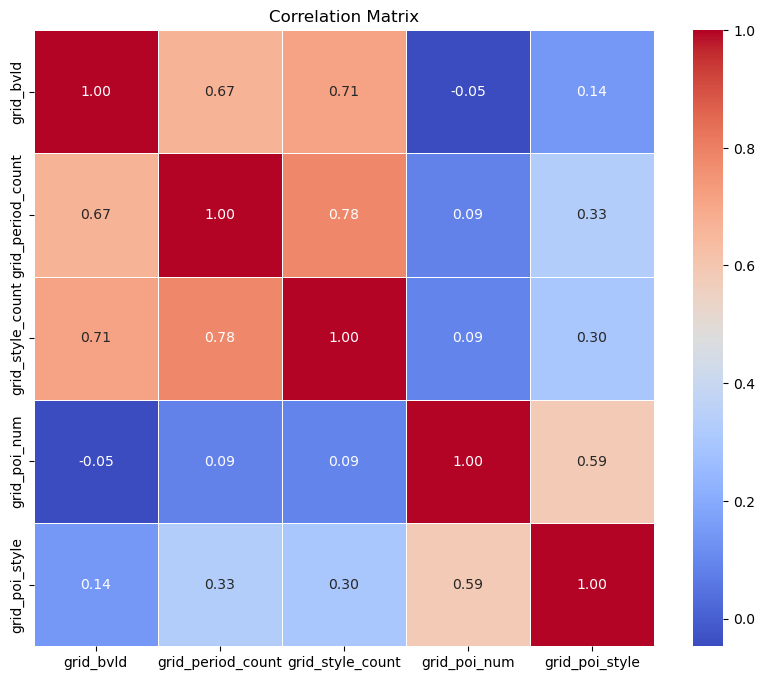

,grid_bvld,grid_period_count,grid_style_count,grid_poi_num,grid_poi_style
grid_bvld,1.000000e+00,5.047601e-33,1.556632e-39,4.631365e-01,2.436283e-02
grid_period_count,5.047601e-33,1.000000e+00,5.478516e-52,1.711219e-01,1.097639e-07
grid_style_count,1.556632e-39,5.478516e-52,1.000000e+00,1.628539e-01,1.745258e-06
grid_poi_num,4.631365e-01,1.711219e-01,1.628539e-01,1.000000e+00,3.820199e-24
grid_poi_style,2.436283e-02,1.097639e-07,1.745258e-06,3.820199e-24,1.000000e+00


In [11]:
#自相关
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 读取 CSV 文件  
#data = merged_perlabelpoi[['negative','neutral','positive','grid_bvld','grid_period_count','grid_style_count','grid_poi_num','grid_poi_style']]

datapo = data_1 [['grid_bvld','grid_period_count','grid_style_count','grid_poi_num','grid_poi_style']]
      
  
# 计算相关性矩阵  
correlation_matrix = datapo.corr()  
  
# 绘制相关性矩阵热图  
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  
plt.title('Correlation Matrix')  
plt.show()  

from scipy.stats import pearsonr

def GetPvalue_Pearson(x,y):
    return pearsonr(x,y)[1]

p_po = datapo.corr(method=GetPvalue_Pearson)
p_po

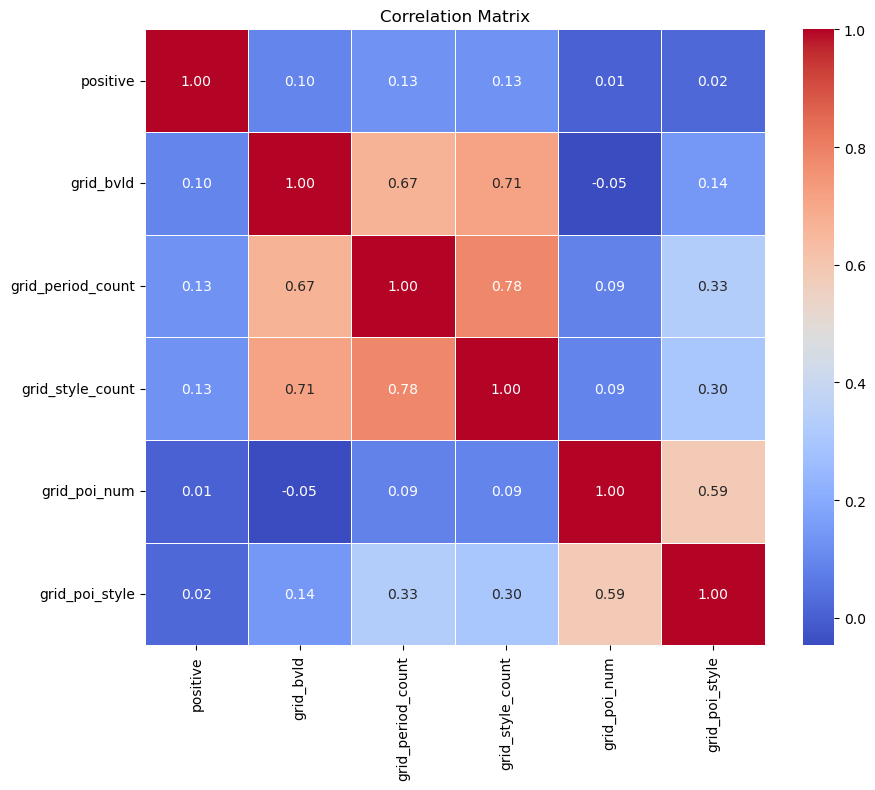

,positive,grid_bvld,grid_period_count,grid_style_count,grid_poi_num,grid_poi_style
positive,1.000000,1.320608e-01,3.756938e-02,4.758092e-02,9.232369e-01,7.667743e-01
grid_bvld,0.132061,1.000000e+00,5.047601e-33,1.556632e-39,4.631365e-01,2.436283e-02
grid_period_count,0.037569,5.047601e-33,1.000000e+00,5.478516e-52,1.711219e-01,1.097639e-07
grid_style_count,0.047581,1.556632e-39,5.478516e-52,1.000000e+00,1.628539e-01,1.745258e-06
grid_poi_num,0.923237,4.631365e-01,1.711219e-01,1.628539e-01,1.000000e+00,3.820199e-24
grid_poi_style,0.766774,2.436283e-02,1.097639e-07,1.745258e-06,3.820199e-24,1.000000e+00


In [14]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 读取 CSV 文件  
#data = merged_perlabelpoi[['negative','neutral','positive','grid_bvld','grid_period_count','grid_style_count','grid_poi_num','grid_poi_style']]

datapo = data_1 [['positive','grid_bvld','grid_period_count','grid_style_count','grid_poi_num','grid_poi_style']]
      
  
# 计算相关性矩阵  
correlation_matrix = datapo.corr()  
  
# 绘制相关性矩阵热图  
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  
plt.title('Correlation Matrix')  
plt.show()  

from scipy.stats import pearsonr

def GetPvalue_Pearson(x,y):
    return pearsonr(x,y)[1]

p_po = datapo.corr(method=GetPvalue_Pearson)
p_po

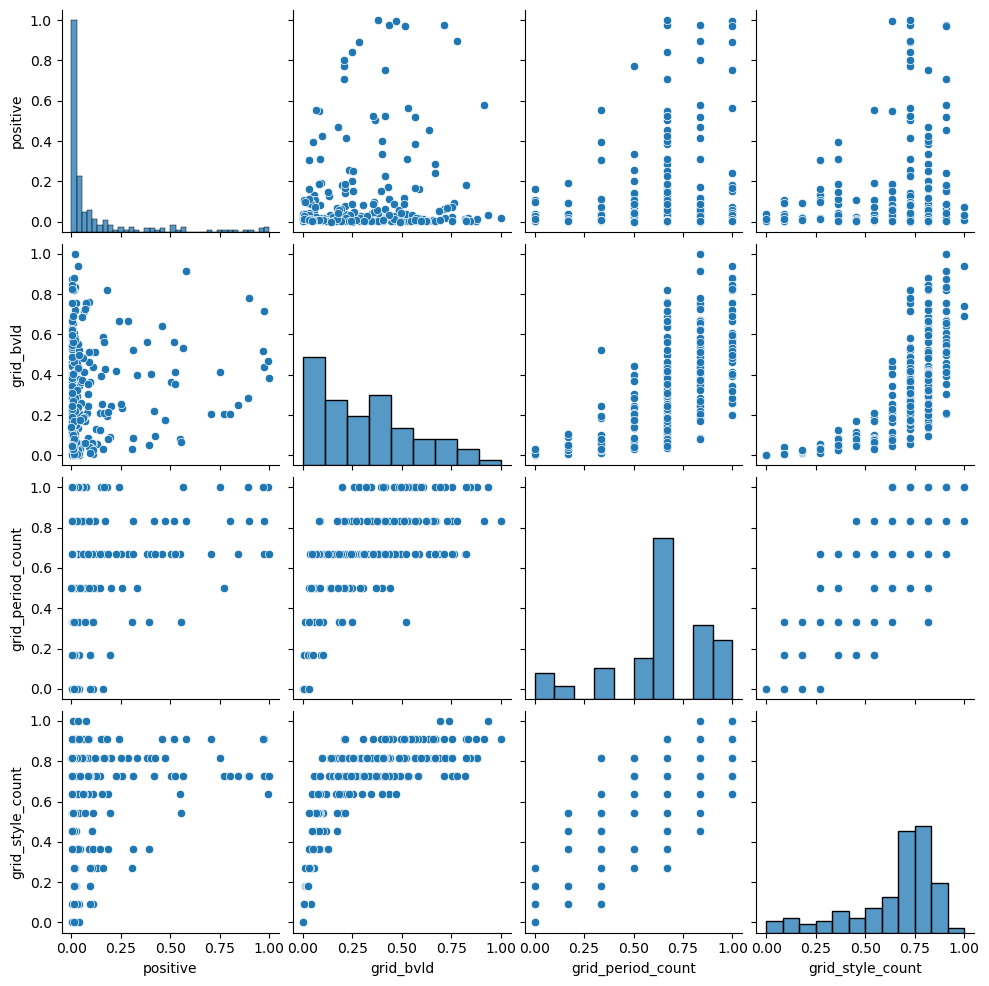

In [267]:
sns.pairplot(data) 

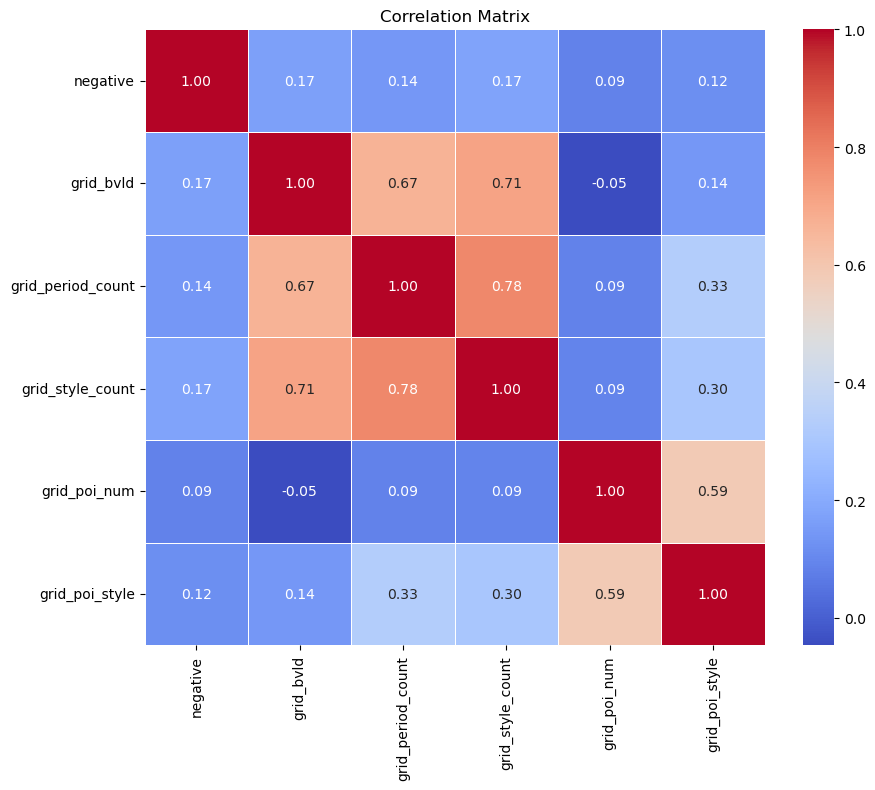

,negative,grid_bvld,grid_period_count,grid_style_count,grid_poi_num,grid_poi_style
negative,1.000000,8.471216e-03,2.381667e-02,6.126841e-03,1.709025e-01,6.285280e-02
grid_bvld,0.008471,1.000000e+00,5.047601e-33,1.556632e-39,4.631365e-01,2.436283e-02
grid_period_count,0.023817,5.047601e-33,1.000000e+00,5.478516e-52,1.711219e-01,1.097639e-07
grid_style_count,0.006127,1.556632e-39,5.478516e-52,1.000000e+00,1.628539e-01,1.745258e-06
grid_poi_num,0.170903,4.631365e-01,1.711219e-01,1.628539e-01,1.000000e+00,3.820199e-24
grid_poi_style,0.062853,2.436283e-02,1.097639e-07,1.745258e-06,3.820199e-24,1.000000e+00


In [16]:
dataneg = data_1 [['negative','grid_bvld','grid_period_count','grid_style_count','grid_poi_num','grid_poi_style']]
      
  
# 计算相关性矩阵  
correlation_matrix = dataneg.corr()  
  
# 绘制相关性矩阵热图  
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  
plt.title('Correlation Matrix')  
plt.show()  

from scipy.stats import pearsonr

def GetPvalue_Pearson(x,y):
    return pearsonr(x,y)[1]

p_neg = dataneg.corr(method=GetPvalue_Pearson)
p_neg

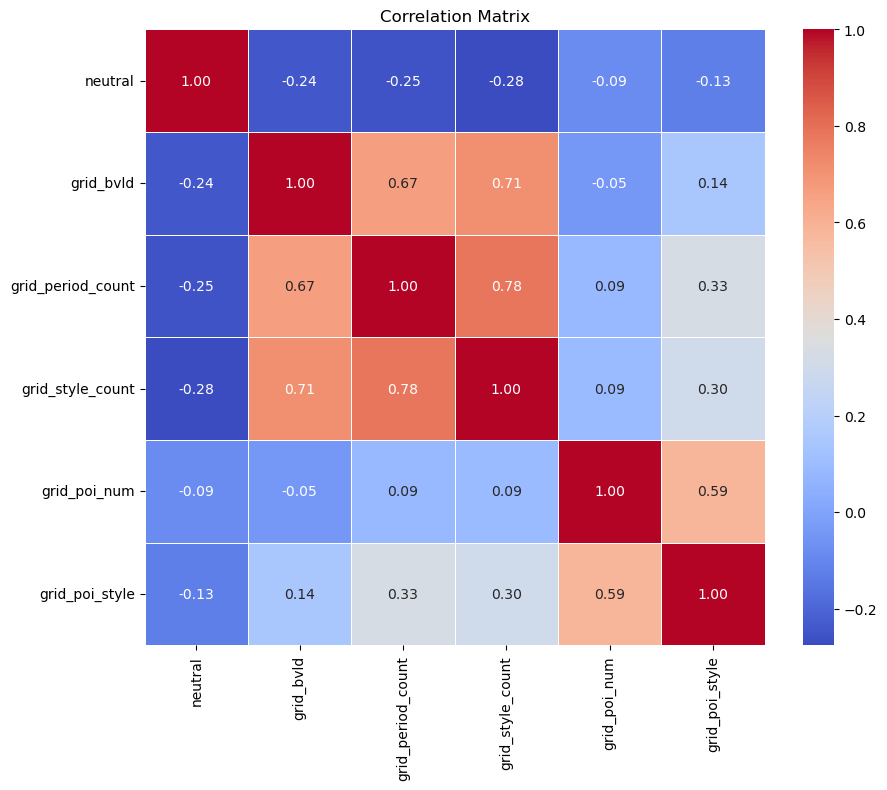

,neutral,grid_bvld,grid_period_count,grid_style_count,grid_poi_num,grid_poi_style
neutral,1.000000,1.217226e-04,5.203838e-05,1.053616e-05,1.801447e-01,4.807033e-02
grid_bvld,0.000122,1.000000e+00,5.047601e-33,1.556632e-39,4.631365e-01,2.436283e-02
grid_period_count,0.000052,5.047601e-33,1.000000e+00,5.478516e-52,1.711219e-01,1.097639e-07
grid_style_count,0.000011,1.556632e-39,5.478516e-52,1.000000e+00,1.628539e-01,1.745258e-06
grid_poi_num,0.180145,4.631365e-01,1.711219e-01,1.628539e-01,1.000000e+00,3.820199e-24
grid_poi_style,0.048070,2.436283e-02,1.097639e-07,1.745258e-06,3.820199e-24,1.000000e+00


In [17]:
dataneu = data_1 [['neutral','grid_bvld','grid_period_count','grid_style_count','grid_poi_num','grid_poi_style']]
      
  
# 计算相关性矩阵  
correlation_matrix = dataneu.corr()  
  
# 绘制相关性矩阵热图  
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  
plt.title('Correlation Matrix')  
plt.show()  

from scipy.stats import pearsonr

def GetPvalue_Pearson(x,y):
    return pearsonr(x,y)[1]

p_neu = dataneu.corr(method=GetPvalue_Pearson)
p_neu

## 网格可视化

In [67]:
poly_gdf

,grid_id,geometry
0,0,"POLYGON ((972200.000 188605.000, 972200.000 18..."
1,1,"POLYGON ((973200.000 188605.000, 973200.000 18..."
2,2,"POLYGON ((974200.000 188605.000, 974200.000 18..."
3,3,"POLYGON ((975200.000 188605.000, 975200.000 18..."
4,4,"POLYGON ((976200.000 188605.000, 976200.000 18..."
...,...,...
2655,2655,"POLYGON ((1005200.000 257605.000, 1005200.000 ..."
2656,2656,"POLYGON ((1006200.000 257605.000, 1006200.000 ..."
2657,2657,"POLYGON ((1007200.000 257605.000, 1007200.000 ..."
2658,2658,"POLYGON ((1008200.000 257605.000, 1008200.000 ..."


In [68]:
# 按照a列进行合并  
merged_df = pd.merge(poly_gdf, data_1 , on='grid_id')  
  
# 显示合并后的DataFrame  
merged_df

,grid_id,geometry,grid_per_num,negative,neutral,positive,grid_bvld,grid_period_count,grid_style_count,grid_poi_num,grid_poi_style
0,236,"POLYGON ((980200.000 194605.000, 980200.000 19...",0.005464,0.321666,0.773933,0.010511,0.023810,0.166667,0.181818,0.181818,0.375
1,237,"POLYGON ((981200.000 194605.000, 981200.000 19...",0.049180,0.246755,0.834293,0.012401,0.087302,0.833333,0.727273,0.218182,0.750
2,274,"POLYGON ((980200.000 195605.000, 980200.000 19...",0.008197,0.216021,0.859984,0.012296,0.035714,0.666667,0.272727,0.272727,0.750
3,276,"POLYGON ((982200.000 195605.000, 982200.000 19...",0.013661,0.039103,0.175897,0.802589,0.206349,0.833333,0.727273,0.072727,0.375
4,277,"POLYGON ((983200.000 195605.000, 983200.000 19...",0.002732,0.003360,0.723809,0.310008,0.083333,0.666667,0.363636,0.072727,0.250
...,...,...,...,...,...,...,...,...,...,...,...
242,2503,"POLYGON ((1005200.000 253605.000, 1005200.000 ...",0.005464,0.003209,0.780592,0.256148,0.234127,0.500000,0.727273,0.036364,0.125
243,2505,"POLYGON ((1007200.000 253605.000, 1007200.000 ...",0.000000,0.004277,0.979695,0.066030,0.170635,0.500000,0.818182,0.036364,0.250
244,2578,"POLYGON ((1004200.000 255605.000, 1004200.000 ...",0.008197,0.069607,0.956749,0.036153,0.000000,0.000000,0.000000,0.018182,0.125
245,2582,"POLYGON ((1008200.000 255605.000, 1008200.000 ...",0.016393,0.203974,0.871342,0.011030,0.115079,0.666667,0.636364,0.054545,0.000


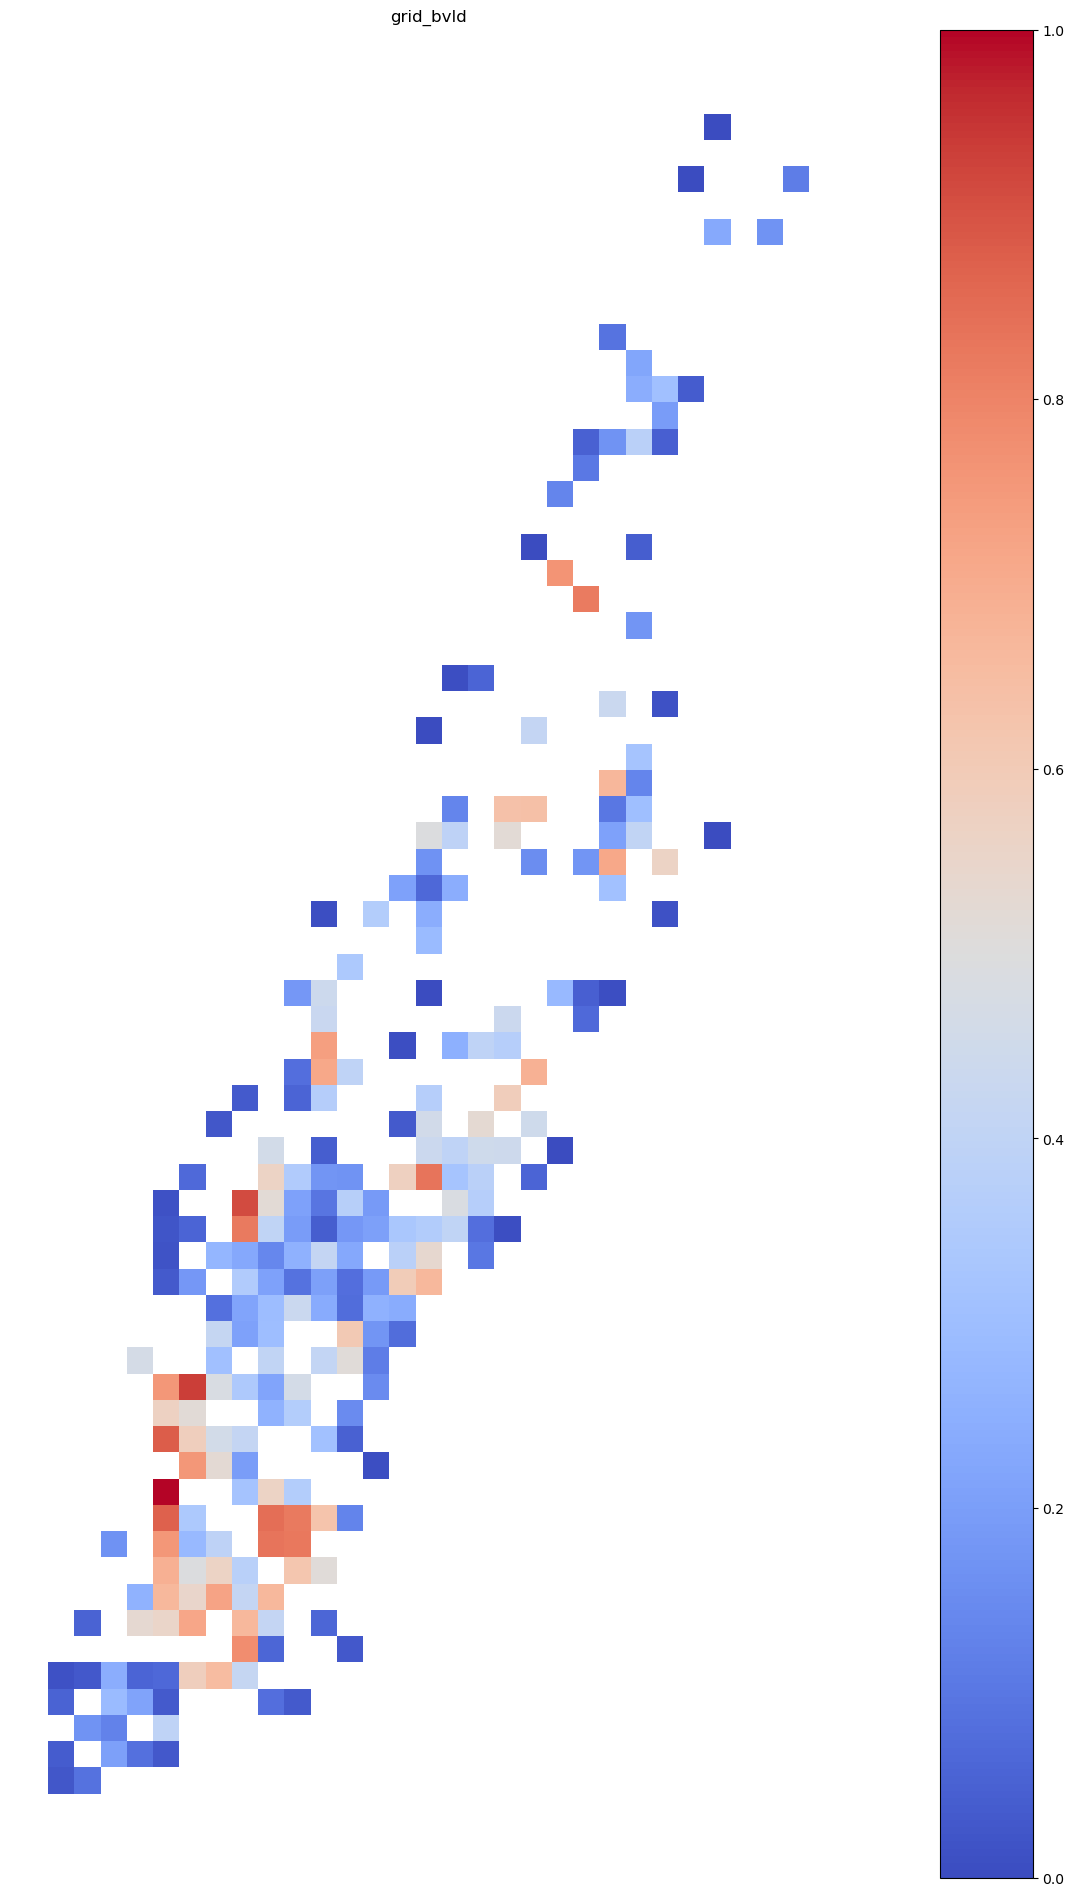

In [69]:
gdf = merged_df
#grid_bvld可视化 
fig, ax = plt.subplots(figsize=(24, 24)) 
gdf.plot(ax=ax, column='grid_bvld', cmap='coolwarm', legend=True)  
plt.axis('off')  # 可选择关闭坐标轴  
plt.title('grid_bvld')  # 可选择添加标题  
plt.show()  

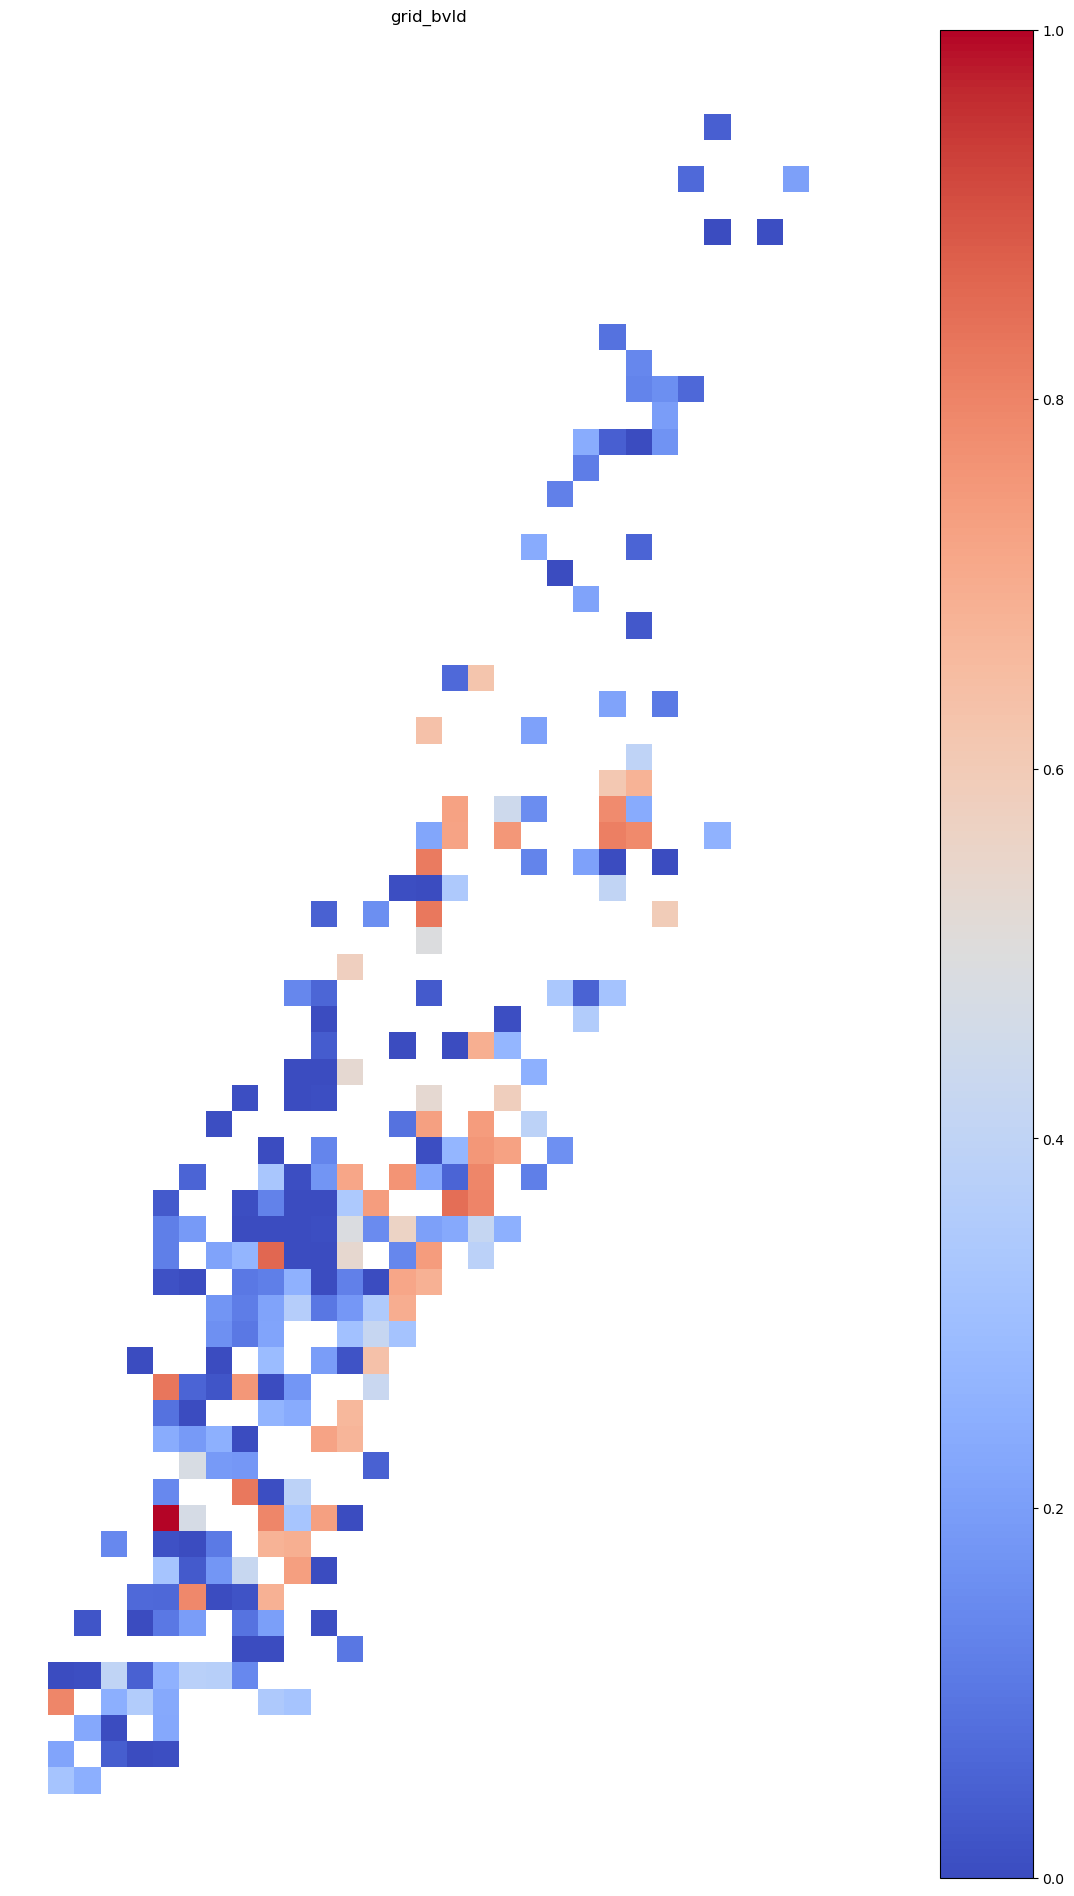

In [70]:
gdf = merged_df
#grid_bvld可视化 
fig, ax = plt.subplots(figsize=(24, 24)) 
gdf.plot(ax=ax, column='negative', cmap='coolwarm', legend=True)  
plt.axis('off')  # 可选择关闭坐标轴  
plt.title('grid_bvld')  # 可选择添加标题  
plt.show() 

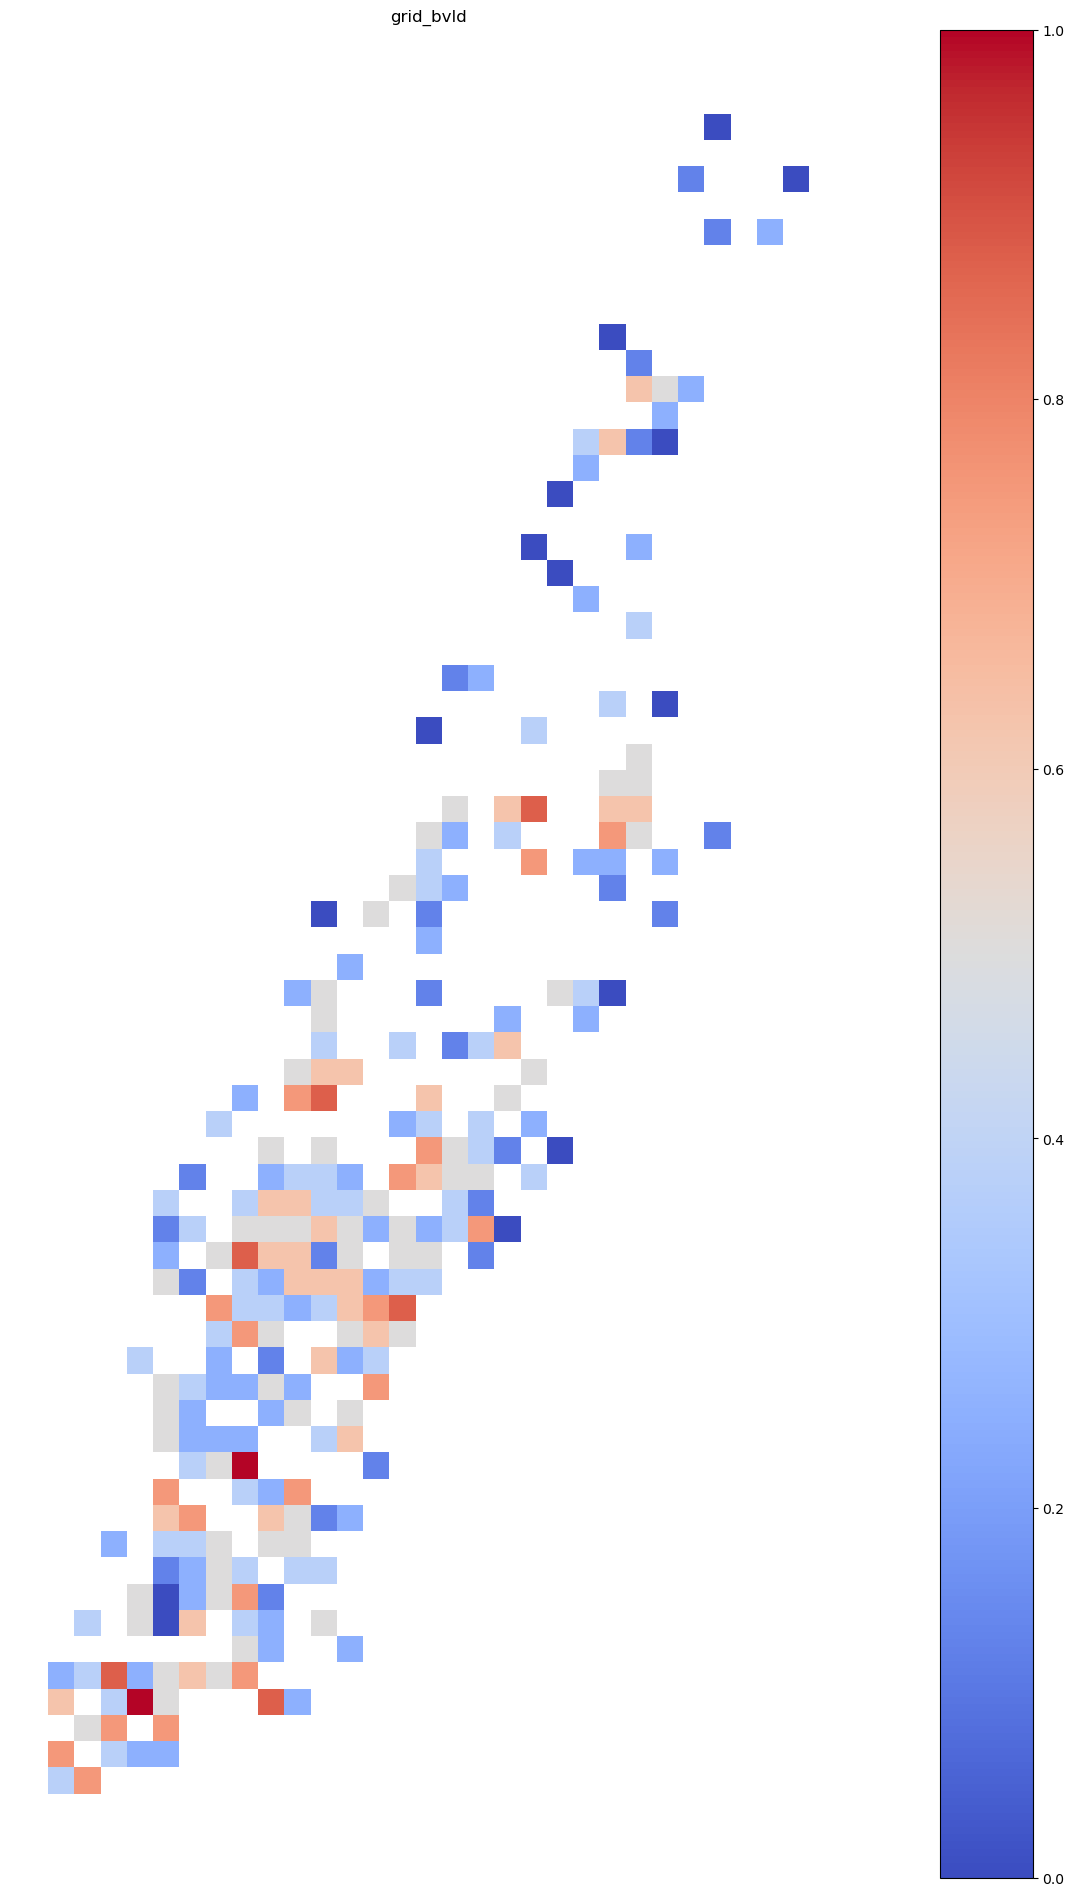

In [71]:
gdf = merged_df
#grid_bvld可视化 
fig, ax = plt.subplots(figsize=(24, 24)) 
gdf.plot(ax=ax, column='grid_poi_style', cmap='coolwarm', legend=True)  
plt.axis('off')  # 可选择关闭坐标轴  
plt.title('grid_bvld')  # 可选择添加标题  
plt.show() 